In [2]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%pdb off

from pyCascade.cti import lesCreateImage as lcm
from pyCascade.cti import lesCreateMovie as vcm
import os
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import scipy as sp
import json

############ Universal ################
home_dir = !pwd
display(home_dir)

Automatic pdb calling has been turned OFF
CTI_SCRIPTS=/Users/nicholasbachand/codes/cascade/scripts
CTI_SCRIPTS=/Users/nicholasbachand/codes/cascade/scripts


['/Users/nicholasbachand/codes/InflowGeneration']

In [3]:
case = "LRB_Cat_B_geometric_1to0"
caseConfig = json.load(open(f"./{case}/caseConfig.json"))
reference = caseConfig["reference"]
scaleFactors = caseConfig["scaleFactors"]
H_build = scaleFactors["H_build"]
scale = scaleFactors["scale"]
alpha = reference["alpha"]
scaling = 1.5*H_build * scale / alpha
hDomain = 3
# wDomain = scaleFactors["wDomain"]
# Uscaling = scaleFactors["Uscaling"]

Cropped image shape: (312, 614)
Cropped image shape: (312, 614)
Cropped image shape: (312, 614)
Cropped image shape: (312, 614)
Cropped image shape: (312, 614)
Cropped image shape: (312, 614)
Cropped image shape: (312, 614)
Cropped image shape: (312, 614)
Cropped image shape: (312, 614)
Cropped image shape: (312, 614)
Cropped image shape: (312, 614)
Cropped image shape: (312, 614)


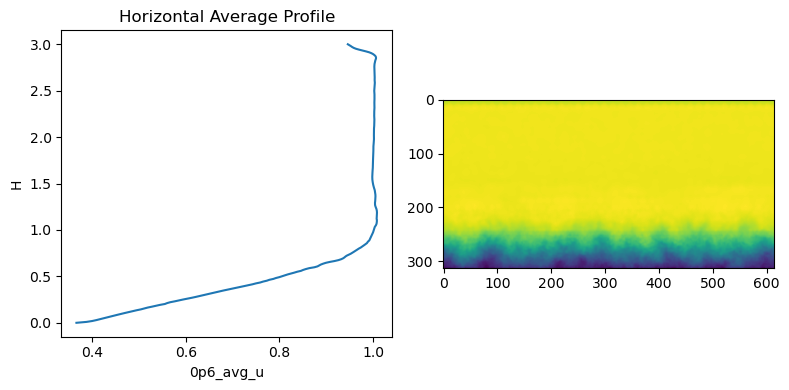

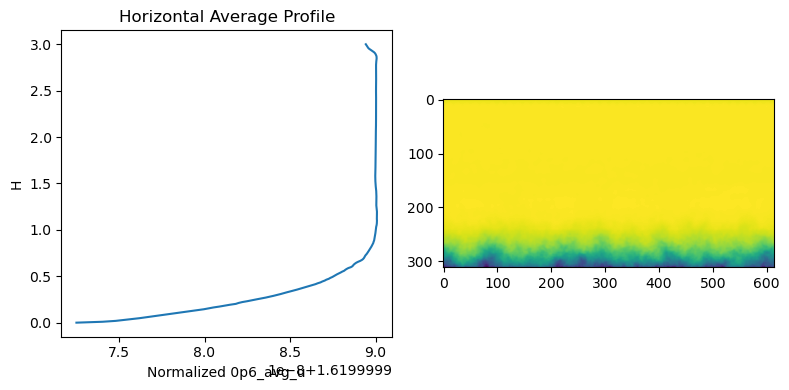

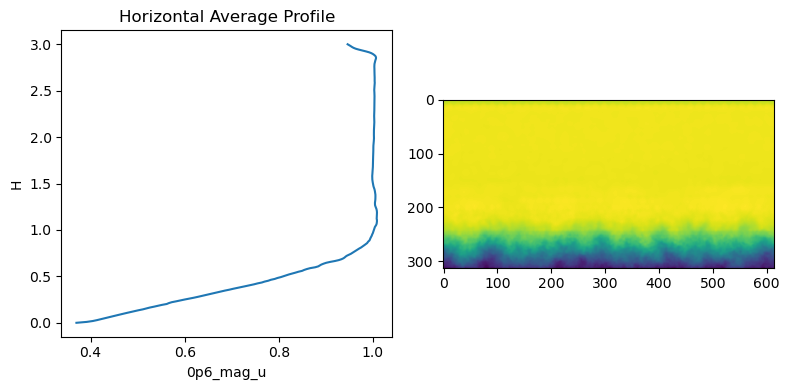

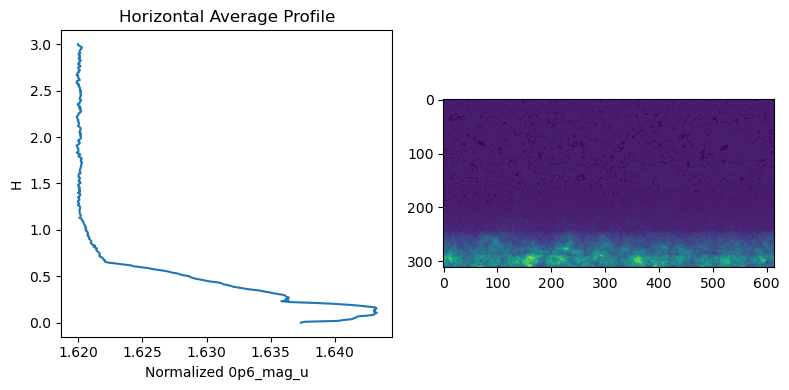

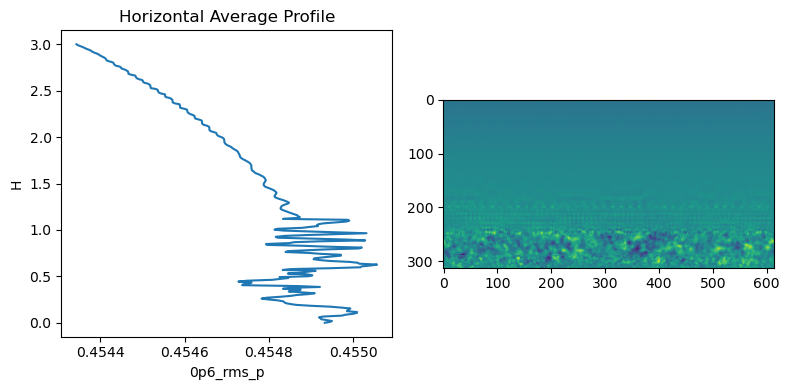

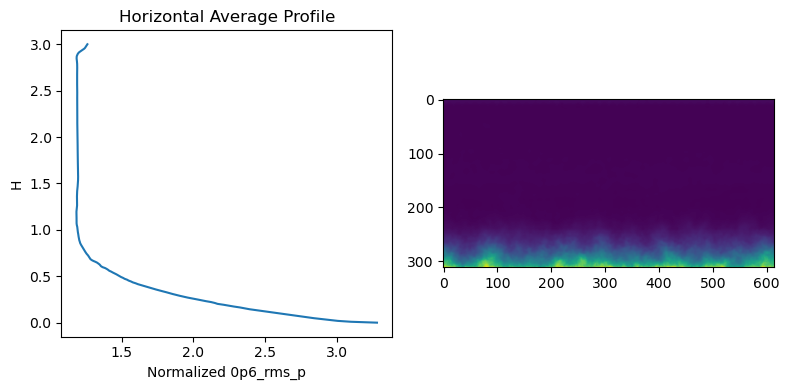

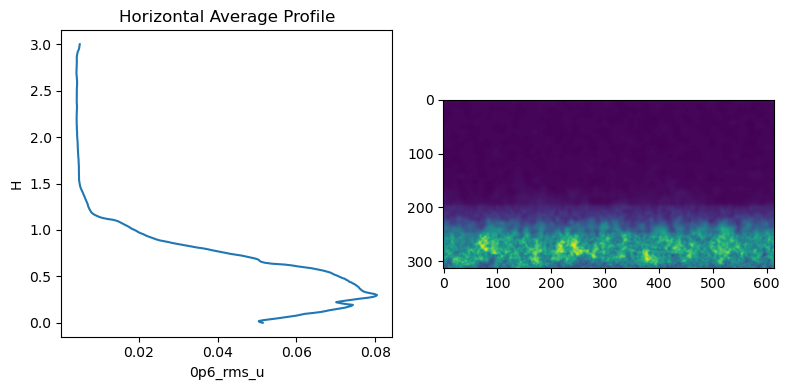

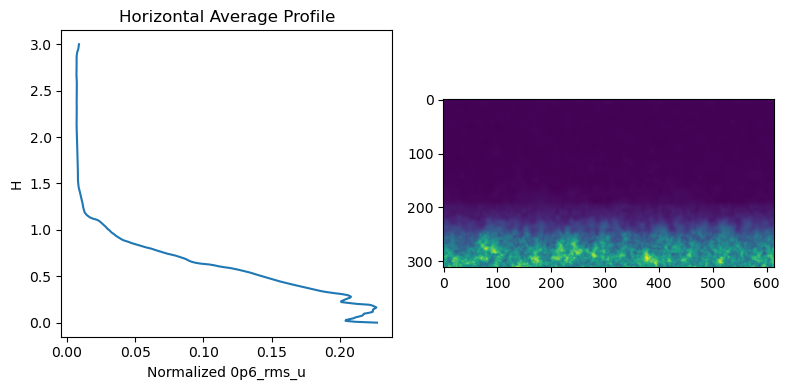

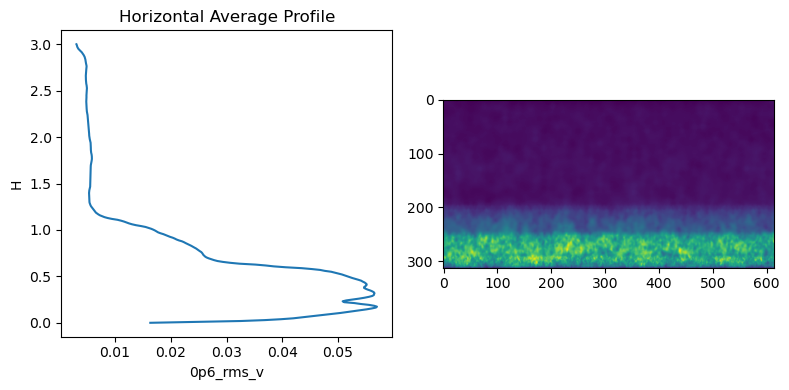

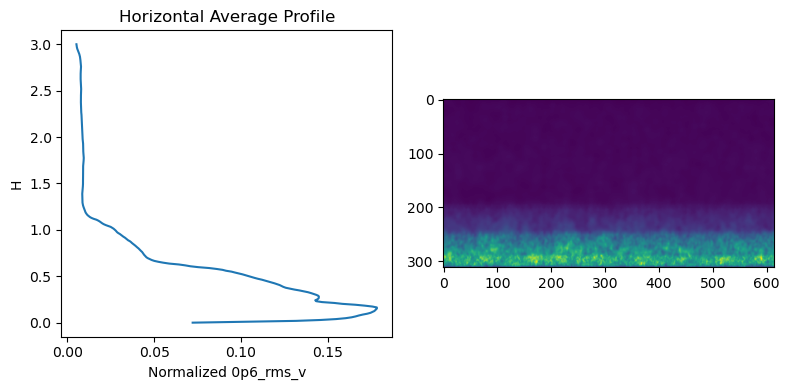

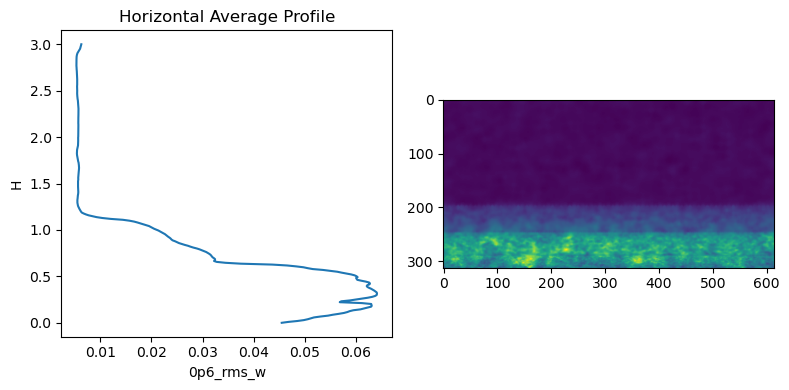

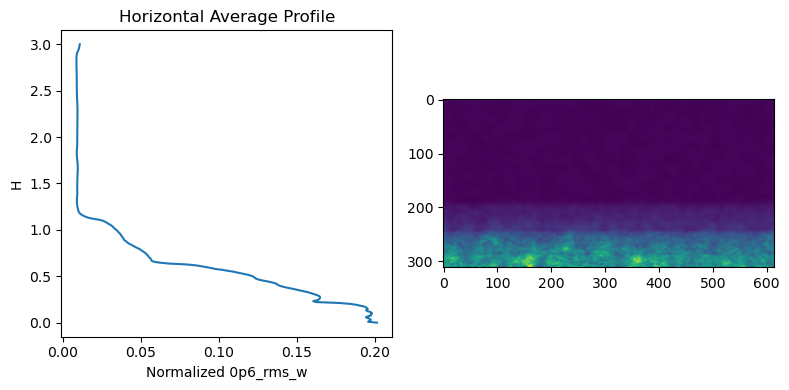

In [22]:
def process_flow_image(image_path, norm_image_path=None, max=100, H=hDomain, qoiScaling=1.0):
    image = vcm.process_image(image_path, varlist=['planar'], cmaplist=None, data_min=[0], data_max=[max])
    if norm_image_path is not None:
        norm_image = vcm.process_image(norm_image_path, varlist=['planar'], cmaplist=None, data_min=[0], data_max=[max])
        image = image / (norm_image + 1e-10)
    else:
        image *= max
    background_value = sp.stats.mode(image, axis=None).mode
    non_bg = (image != background_value)
    if non_bg.size > 0:
        # Find the indices of non-background pixels
        rows = np.where(non_bg.any(axis=1))[0]
        cols = np.where(non_bg.any(axis=0))[0]

        if rows.size and cols.size:
            y_min, y_max = rows[0], rows[-1]
            x_min, x_max = cols[0], cols[-1]
            image = image[y_min:y_max+1, x_min:x_max+1]
        print("Cropped image shape:", image.shape)
    image *= qoiScaling
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), layout="tight")
    ax[1].imshow(image)

    horizontal_avg = np.mean(image, axis=1)
    ax[0].plot(horizontal_avg, np.linspace(H, 0, len(horizontal_avg)))
    qoi = image_path.split('/')[-1].split('.')[0]
    if norm_image_path is not None:
        qoi = f"Normalized {qoi}"
    ax[0].set_ylabel("H")
    ax[0].set_xlabel(qoi)
    ax[0].set_title("Horizontal Average Profile")
    return

qois = ["avg_u", "mag_u", "rms_p", "rms_u", "rms_v", "rms_w"]
scalings = [1/reference['k'], 1/reference['k'], 1/reference['k']**2, 1/reference['k'], 1/reference['k'], 1/reference['k']]
step = "00030000"
for qoi, scaling in zip(qois, scalings):
    image_path = f"{case}/image/0p6_{qoi}.{step}.png"
    process_flow_image(image_path, max=100, H=hDomain, qoiScaling=scaling)
    process_flow_image(image_path, norm_image_path=f"{case}/image/0p6_avg_u.{step}.png", max=100, H=hDomain, qoiScaling=reference['k'])

Reference velocity at 5.994 m: 10.248 m/s
For ABL plot, y normalized by H = 0.340 m, or 68.000 m in simulation space
For ABL plot, U scaled by 1.620 m/s, or 1.620 m/s in simulation space
For ABL plot, y normalized by H = 0.340 m, or 68.000 m in simulation space
For ABL plot, y normalized by H = 0.340 m, or 68.000 m in simulation space
For ABL plot, y normalized by H = 0.340 m, or 68.000 m in simulation space


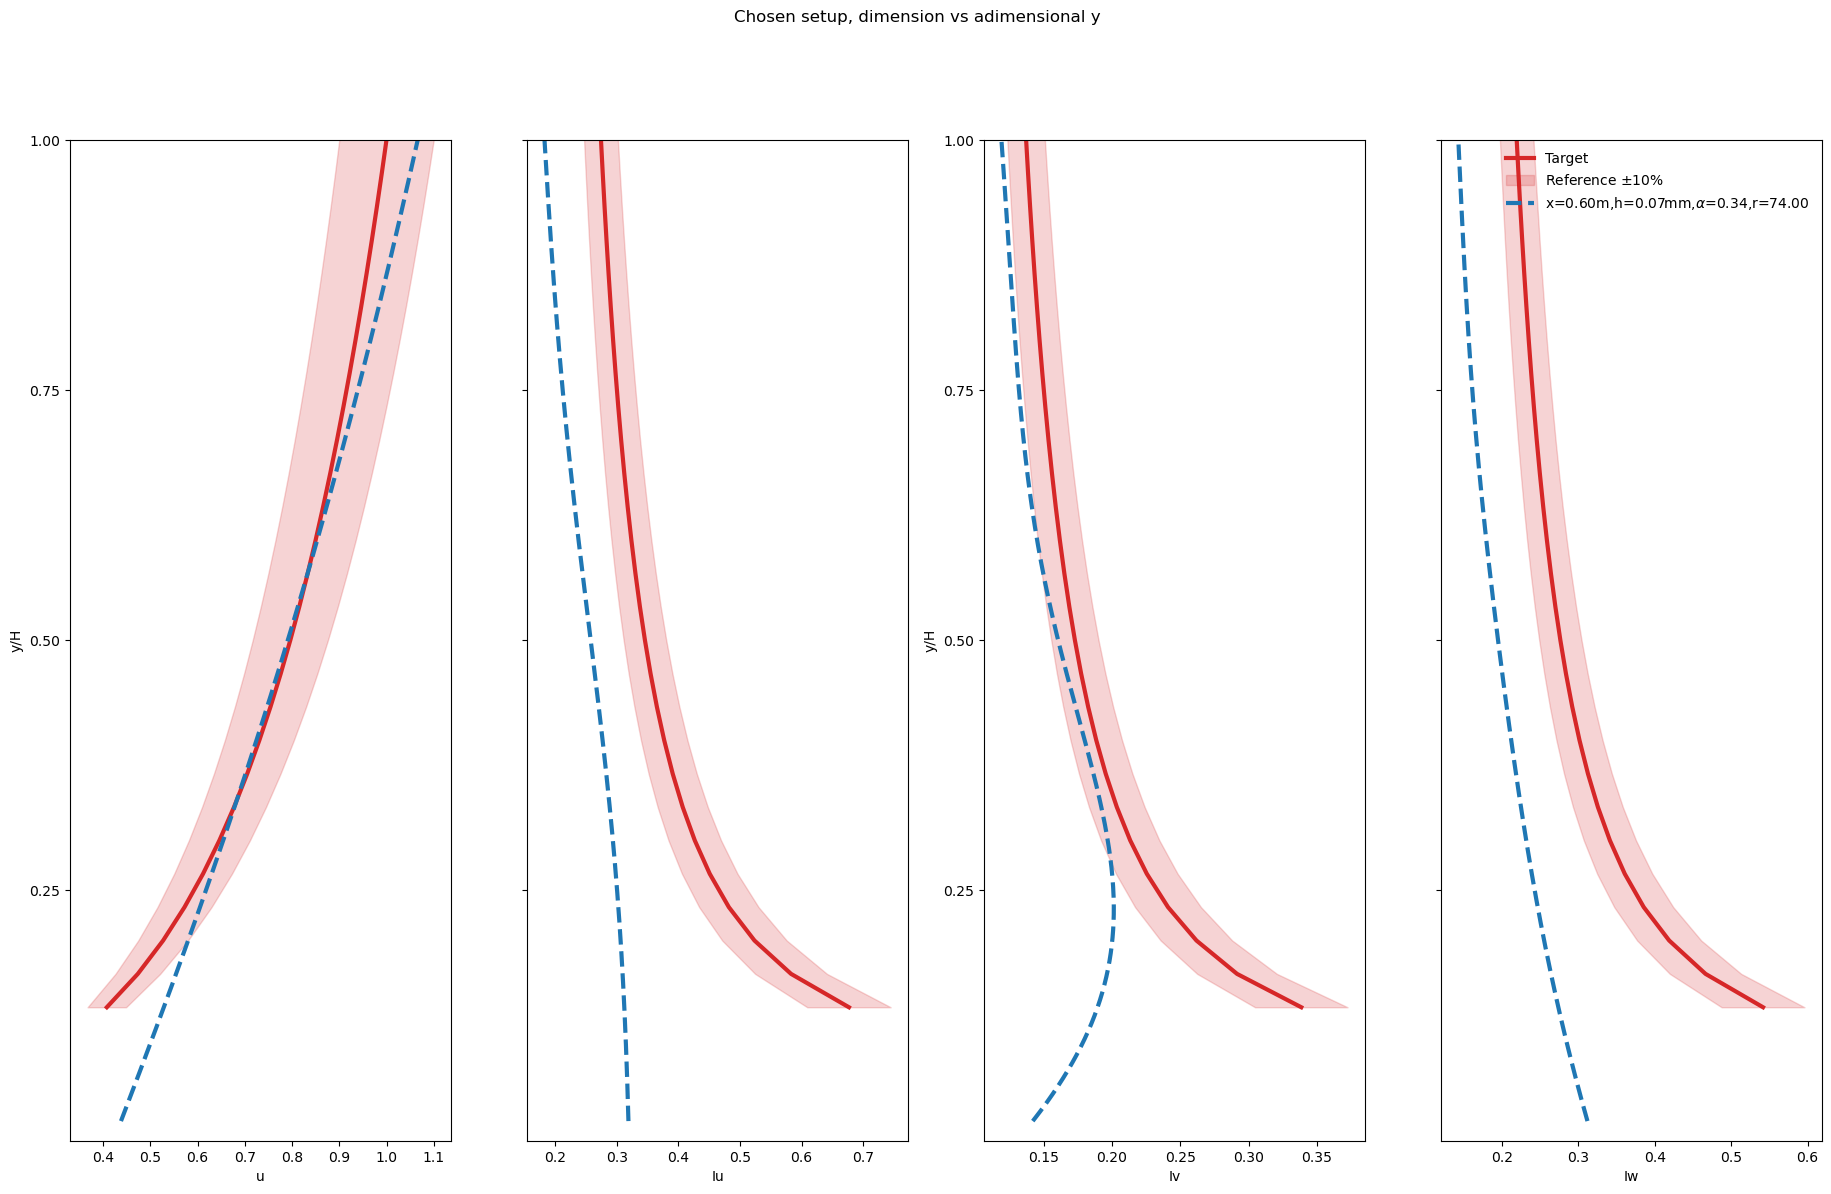

In [16]:
from generateInflow import plotABL
plotABL(reference, save=False)